<a href="https://colab.research.google.com/github/beatricekiplagat/Week-4-Core-Independent-Project/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_07_Beatrice_Kiplagat_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Electric Car-Sharing Service Company


## 1. Defining the Question


As a Data Scientist for the Autolib electric car-sharing service company, I have been tasked to investigate a claim that on average, only all clients who take blue cars over the weekend, will return them during the weekend. The rest will return them during weekdays. Thus, we would like to check if the mean number of blue cars taken on Saturday/Sunday is equal to the mean number of blue cars returned on Saturday/Sunday, from the provided Autolib dataset.

In an effort to do this, we need to identify some areas of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

To work on this project, we will perform the following analysis with Python; 

1. Find and deal with outliers, anomalies, and missing data within the dataset.
2. Plot appropriate univariate and bivariate summaries recording our observations.
3. Implement the solution by performing hypothesis testing.




##2. Specifying the Hypotheses


> H₀ :μ(Blue Cars taken on weekend) = μ(Blue Cars returned on weekend)      
 H₁ :μ(Blue Cars taken on weekend) ≠ μ(Blue Cars returned on weekend)

## 3. Reading the Data

In [103]:
# Loading the Data from the source 
# ---
# Dataset url = http://bit.ly/2017ACTScoresDataset
# ---
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy import stats
import statsmodels.api as sm

df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## 4. Checking the Data

In [104]:
# Determining the no. of records in our dataset
#
df.shape

(16085, 13)

> Our dataset has 16,085 rows and 13 columns

In [105]:
# Detecting our column names
#
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

> The column names of our dataset are 'Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'

In [106]:
# Previewing the top of our dataset
#
df.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [107]:
# Previewing the bottom of our dataset
# 
df.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [108]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

> Our data types are all appropriate, except the 'date' column. We shall need convert it to datetime for ease of calculation

In [109]:
# Convert the date to datetime data type, then check the datatypes again
#
df['date'] =  pd.to_datetime(df['date'])
df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [110]:
# Check the number of unique variables in each column
#

df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

## 5. Tidying the Dataset

We will clean our data set using the integrity rules i.e Accuracy, Completeness, Consistency, Uniformity & Validity. But first, we'll filter out the colums we do not need for our tests, for efficiency during cleaning.



In [111]:
# Since we are interested in blue cars over the weekend, we'll drop the rest of the columns
#
df.drop([ 'n_daily_data_points', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'], axis = 1, inplace = True)
df

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,2018-01-01,0,weekday,110,103
1,75001,2018-01-02,1,weekday,98,94
2,75001,2018-01-03,2,weekday,138,139
3,75001,2018-01-04,3,weekday,104,104
4,75001,2018-01-05,4,weekday,114,117
...,...,...,...,...,...,...
16080,95880,2018-06-15,4,weekday,15,10
16081,95880,2018-06-16,5,weekend,19,19
16082,95880,2018-06-17,6,weekend,33,35
16083,95880,2018-06-18,0,weekday,11,14


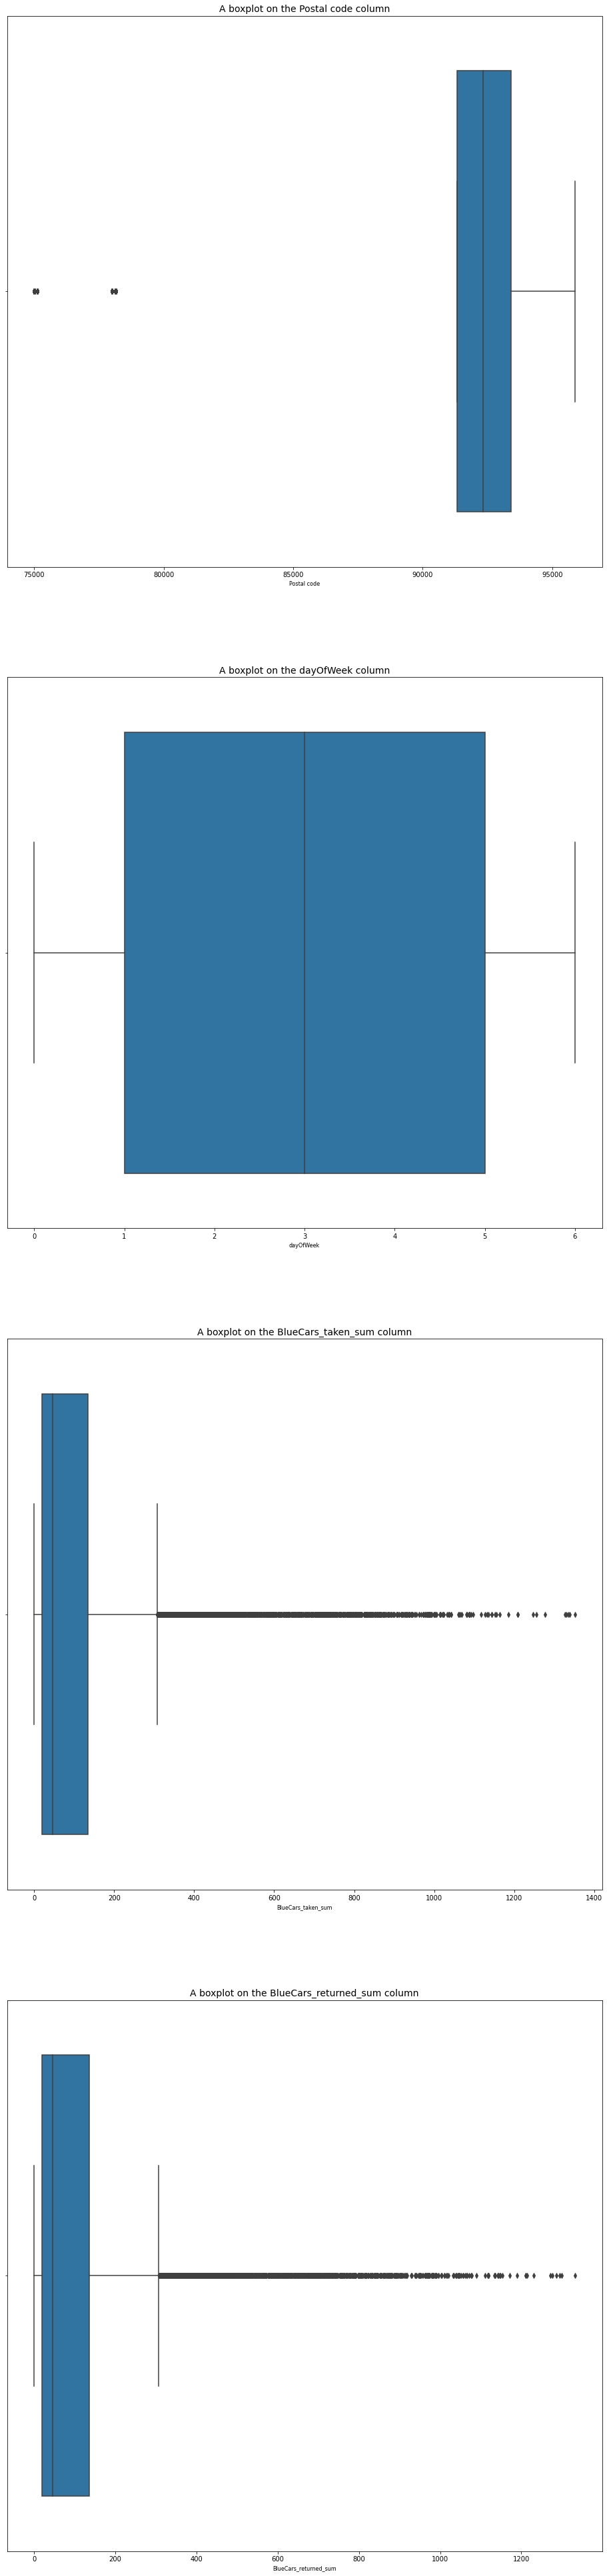

In [112]:
# Checking for Outliers & Anomalies

#
col_names = ['Postal code',  'dayOfWeek', 'BlueCars_taken_sum', 'BlueCars_returned_sum']
fig, ax = plt.subplots(len(col_names), figsize = (16,70))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [113]:
# Checking the number of outliers using IQR, for our numerical columns
#
df1 = df[[ 'BlueCars_taken_sum', 'BlueCars_returned_sum']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()


BlueCars_taken_sum       2215
BlueCars_returned_sum    2213
dtype: int64

> We have quite a large number of outliers in the BlueCars_returned_sum & the BlueCars_taken_sum columns. The 'dayOfWeek'column has no outliers, & 'Postal code' has few outliers.
The outliers on the 'Postal code' are entries from 4 different postal codes. We shall not remove them as during sampling we shall select the specific postal code we want. As for the Blue cars returned and taken sums columns, we shall not proceed to remove our outliers since they are a very significant number and removing them may heavily skew our data and provide wrong insights.

In [114]:
# Check the shape of the new dataset
#
df.shape

(16085, 6)

> Our new dataset contains 16085 rows and 6 columns.

In [115]:
# Checking for Missing Data

df.isnull().sum()

Postal code              0
date                     0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
dtype: int64

> Our data has no missing values

In [116]:
# Check for duplicates
#
df.duplicated().sum()

0

> Our data also has no duplicates

In [117]:
# Checking final information of our dataset
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Postal code            16085 non-null  int64         
 1   date                   16085 non-null  datetime64[ns]
 2   dayOfWeek              16085 non-null  int64         
 3   day_type               16085 non-null  object        
 4   BlueCars_taken_sum     16085 non-null  int64         
 5   BlueCars_returned_sum  16085 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 754.1+ KB


## 6. Sampling

We shall use cluster sampling for our data for ease of processing and due to time constraints. We shall make an assumption that the sample will be a representative of the general population and that our sample has the same statistical distribution as the population. We shall create clusters by postal code. Each postal code has approximately 156 entries, thus we can use random sampling to select our cluster from the list.
We will filter our data frame to only contain data for the weekend values as our hypothesis covers only weekend data.

In [118]:
# First filter dataframe and select only weekend values as our hypothesis does not require weekday values
#
df_sample = df.loc[df['day_type'] == 'weekend']
df_sample

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
5,75001,2018-01-06,5,weekend,187,185
6,75001,2018-01-07,6,weekend,180,180
12,75001,2018-01-13,5,weekend,224,223
13,75001,2018-01-14,6,weekend,193,193
19,75001,2018-01-20,5,weekend,217,217
...,...,...,...,...,...,...
16068,95880,2018-06-03,6,weekend,36,33
16074,95880,2018-06-09,5,weekend,15,15
16075,95880,2018-06-10,6,weekend,34,32
16081,95880,2018-06-16,5,weekend,19,19


In [119]:
# We will then pick a random cluster using the code below
#
df_sample['Postal code'].sample()


15271    94500
Name: Postal code, dtype: int64

> We shall use the postal code 75015 as that was the value provided.
> Since the code picks random values, it may pick different values when re-run. Thus we will disregard them

In [120]:
# Filter sample to contain the cluster selected above
df_sample = df_sample.loc[df_sample['Postal code'] == 75015]
df_sample

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
2189,75015,2018-01-06,5,weekend,1061,1015
2190,75015,2018-01-07,6,weekend,913,971
2196,75015,2018-01-13,5,weekend,1255,1211
2197,75015,2018-01-14,6,weekend,1097,1135
2203,75015,2018-01-20,5,weekend,1352,1300
2204,75015,2018-01-21,6,weekend,1132,1149
2210,75015,2018-01-27,5,weekend,1248,1214
2211,75015,2018-01-28,6,weekend,1014,1049
2217,75015,2018-02-03,5,weekend,1327,1287
2218,75015,2018-02-04,6,weekend,1043,1118


In [121]:
# Check info on our sample
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 2189 to 2337
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Postal code            44 non-null     int64         
 1   date                   44 non-null     datetime64[ns]
 2   dayOfWeek              44 non-null     int64         
 3   day_type               44 non-null     object        
 4   BlueCars_taken_sum     44 non-null     int64         
 5   BlueCars_returned_sum  44 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.4+ KB


> This is the ample we shall use as a representative of our general population. It has 44 rows and 6 columns. No null values, and no duplicates, as previously checked.


## 7. Exploratory Analysis

### a) Univariate Analysis

#### ***Measures of Central Tendency***

In [122]:
# Mode
# Calculating mode across different columns

df_sample[['BlueCars_taken_sum' , 'BlueCars_returned_sum']].mode()

,BlueCars_taken_sum,BlueCars_returned_sum
0,1144,979
1,1209,1118


> From our analysis, we can see where most of our data lies for each of the columns, as indicated on the first row. 
> Most of our data was collcted on Friday, most common total number of blue cars taken is 1144	and those returned is 979. We shall ignore the postal code and the day_type as they contain only one value.

In [123]:
# Mean
# Calculating the mean for our numerical columns
df_sample[['BlueCars_taken_sum' , 'BlueCars_returned_sum']].mean(axis=0)

BlueCars_taken_sum       1072.772727
BlueCars_returned_sum    1084.250000
dtype: float64

> The average number of blue cars taken is 1072 and those returned is 1084

In [124]:
# Median
# Calculating the median for our numerical columns

df_sample[['BlueCars_taken_sum' , 'BlueCars_returned_sum']].median(axis=0)


BlueCars_taken_sum       1084.5
BlueCars_returned_sum    1118.0
dtype: float64

> The median number of blue cars taken is 1084 and those returned is 1118


#### ***Measures of Dispersion***

In [125]:
# Standard Deviation & Variance
# We will now calculate the standard deviation and variance to check the spread of our data from the mean
range1 = df['BlueCars_taken_sum'].max() - df['BlueCars_taken_sum'].min()
range2 = df['BlueCars_returned_sum'].max() - df['BlueCars_returned_sum'].min()
std = df_sample[['BlueCars_taken_sum' , 'BlueCars_returned_sum']].std()
var = df_sample[['BlueCars_taken_sum' , 'BlueCars_returned_sum']].var()
print('Range: "BlueCars_taken_sum" ', range1 ,'"BlueCars_returned_sum" ', range2) 
print('Std deviation:', std)
print('Variance:', var)

Range: "BlueCars_taken_sum"  1352 "BlueCars_returned_sum"  1332
Std deviation: BlueCars_taken_sum       211.909136
BlueCars_returned_sum    199.177743
dtype: float64
Variance: BlueCars_taken_sum       44905.482030
BlueCars_returned_sum    39671.773256
dtype: float64


> Both columns have a high standard deviation and variance, showing that they're both spread over a wide range as evidenced by the ranges

In [126]:
# Skewness
# We will now calculate the skewness to check the assymetry of the distribution

df_sample[['BlueCars_taken_sum' , 'BlueCars_returned_sum']].skew()

BlueCars_taken_sum      -2.642853
BlueCars_returned_sum   -3.154048
dtype: float64

> Our columns are both negatively skewed, indicating that the tail is bigger on the left side

In [127]:
# Kurtosis
# We will now calculate the kurtosis to check the tail of our distribution

df_sample[['BlueCars_taken_sum' , 'BlueCars_returned_sum']].kurt()

BlueCars_taken_sum       11.796421
BlueCars_returned_sum    14.277760
dtype: float64

> Our columns are both leptokurtic. This may be due to the fact that we didn't remove the outliers in our dataframe

#### ***Plots***

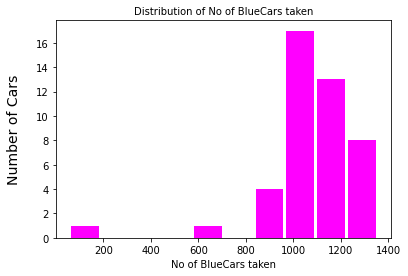

In [128]:
# Graphical representation of Blue cars taken
cars = df_sample['BlueCars_taken_sum']
plt.hist(cars, bins=10, histtype='bar', rwidth=0.9, color = 'magenta')
plt.xlabel('No of BlueCars taken', fontsize=10)
plt.ylabel('Number of Cars', fontsize=14, labelpad=15)
plt.title('Distribution of No of BlueCars taken', fontsize=10)

plt.show()

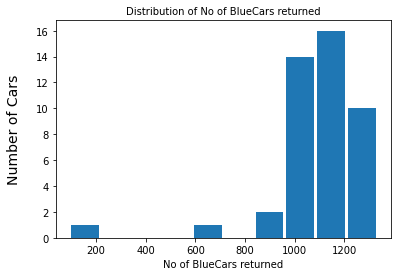

In [129]:
# Graphical representation of Blue cars returned
cars2 = df_sample['BlueCars_returned_sum']
plt.hist(cars2, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('No of BlueCars returned', fontsize=10)
plt.ylabel('Number of Cars', fontsize=14, labelpad=15)
plt.title('Distribution of No of BlueCars returned', fontsize=10)

plt.show()

##### Summary

> From our univariate analysis, we can see the following:
>
> 1.   Most common total number of blue cars taken is 1144 and those returned is 979.
> 2.   The average number of blue cars taken is 1072 and those returned is 1084
> 3.   The median number of blue cars taken is 1084 and those returned is 1118
> 4.   Both columns have a high standard deviation and variance, showing that they're both spread over a wide range as evidenced by the ranges
> 5.  Our columns are both negatively skewed, indicating that the tail is bigger on the left side
> 6.  Our columns are both leptokurtic. This may be due to the fact that we didn't remove the outliers in our dataframe 

### b) Bivariate Analysis
We shall carry out bivariate analysis to check the relationships and measure the strengths of these relationships between 2 variables

In [130]:
# Check for correlation in our numerical data
#
correlation = df_sample[['BlueCars_taken_sum' , 'BlueCars_returned_sum']].corr()
correlation

,BlueCars_taken_sum,BlueCars_returned_sum
BlueCars_taken_sum,1.000000,0.970754
BlueCars_returned_sum,0.970754,1.000000


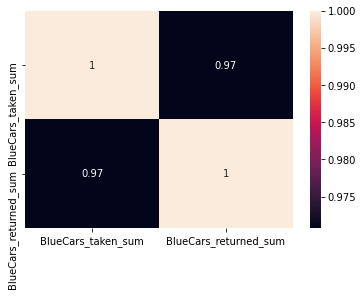

In [131]:
# Plotting a correlation heatmap
#
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

> Our numerical columns have 0.97% correlation, indicating that they are strongly positively correlated.

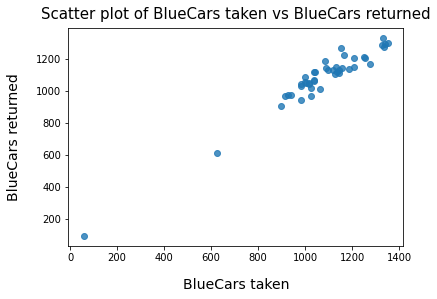

In [132]:
# Creating a scatterplot to check the linear regression betweeen our columns
#
sns.regplot(x = df_sample['BlueCars_taken_sum' ], y = df_sample[ 'BlueCars_returned_sum'], fit_reg=False)

plt.title("Scatter plot of BlueCars taken vs BlueCars returned", fontsize=15, y=1.015)
plt.xlabel('BlueCars taken', fontsize=14, labelpad=15)
plt.ylabel('BlueCars returned', fontsize=14, labelpad=15)
plt.show()

We can see that our columns have a positive linear relationship and are correlated



####QQ plot to check for normality of the data

In [134]:
# Importing libraries to plot our Q-Q plot
#
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# seed the random number generator
#
np.random.seed(1)

# q-q plot
qqplot(df_sample, line='s')
pyplot.show()


TypeError: ignored

##### Summary
> From our bivariate analysis, we can see that there exists a strong linear relations between the number of cars taken and the numer of cars returned.
> From the QQplot, we can see that our data fits into the normal distribution

## 8. Implementing the Solution


In this section, we shall carry out Hypothesis testing. The steps to be followed are:
> Step 1: Formulate the null hypothesis and the alternative hypothesis

> Step 2: Identify a test statistic and significance level that can be used to assess the truth of the null hypothesis.

> Step 3: Computing the test-statistic and P-value. The smaller the P-value, the stronger the evidence against the null hypothesis.

> Step 4: Analyze the results and either accept or reject the null hypothesis.

> Step 5: Interpreting the Results

### Step 1: Formulate the null hypothesis and the alternative hypothesis

Our null & alternative hypotheses are:

> H₀ :μ(Blue Cars taken on weekend) = μ(Blue Cars returned on weekend)

> H₁ :μ(Blue Cars taken on weekend) ≠ μ(Blue Cars returned on weekend)


### Step 2: Identify a test statistic and significance level that can be used to assess the truth of the null hypothesis.

> For our sample, we shall use a significance level of 5%
> We shall use a 2 paired sample z=test as we have 2 datasets, our sample contains more than 30 values and our samples are independent of each other.

### Step 3: Computing the test-statistic and P-value. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [135]:
# Mean of first sample
#
x1 = df_sample['BlueCars_taken_sum'].mean()
x1

1072.7727272727273

In [136]:
# Mean of second sample
#
x2 = df_sample['BlueCars_returned_sum'].mean()
x2

1084.25

In [137]:
# Std deviation of first sample
#
sd1 = df_sample['BlueCars_taken_sum'].std()
sd1

211.90913625796864

In [138]:
# Std deviation of second sample
#
sd2 = df_sample['BlueCars_returned_sum'].std()
sd2

199.1777428725759

In [139]:
# Size of first sample
#
n1 = df_sample['BlueCars_taken_sum'].count()
n1

44

In [140]:
# Size of second sample
#
n2 = df_sample['BlueCars_returned_sum'].count()
n2

44

In [141]:
# Computing the test-statistic and P-value
#
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

z, p = twoSampZ(x1, x2, 0, sd1, sd2,n1,n2)
print (z, p)

-0.262 0.7935


### Step 4: Analyze the results and either accept or reject the null hypothesis.


> Our p-value is 0.7935 which is greater than our signicance level, giving us no evidence to reject our null hypothesis. Thus, we shall accept our null hypothesis.

### Step 5: Interpreting the Results

> Our results mean that there is a 79.35% chance that the mean number of blue cars taken over the weekend is equal to the mean number of blue cars returned during the weekend. Thus, we can confidently say that clients who take blue cars over the weekend, will return them during the weekend.

### Point Estimate

In [142]:
# We wil use the "seed" value of 10. 
#
np.random.seed(10)

# Use the stats module to generate random variables for our population. Here we specify our abitrary mean and a standard deviation, which are loc and scale respectively
#
df = stats.norm.rvs(loc=165, scale=1, size=12000)
print ( df )  

# Calculate the population mean
#
df.mean()


[166.3315865  165.71527897 163.45459971 ... 164.23492813 165.93433224
 164.96061071]


165.0052858249647

In [143]:
np.random.seed(6)
# Sample 1000 values
#
df_sample = np.random.choice(a= df, size=500000)            

# Show sample mean
#
print (df_sample.mean() )                         

df.mean().mean() - df_sample.mean()

165.00447335360178


0.0008124713629058533

## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes, we have the right data to test our hypothesis.

### b). Do we need other data to answer our question?

We do not need other data as the data provided was more than sufficient to  test our hypothesis.

### c). Did we have the right question?
We do, however we can add more questions to give more validity to our claim.
